In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv"
data = pd.read_csv(url)

# Explore the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.shape

(1338, 7)

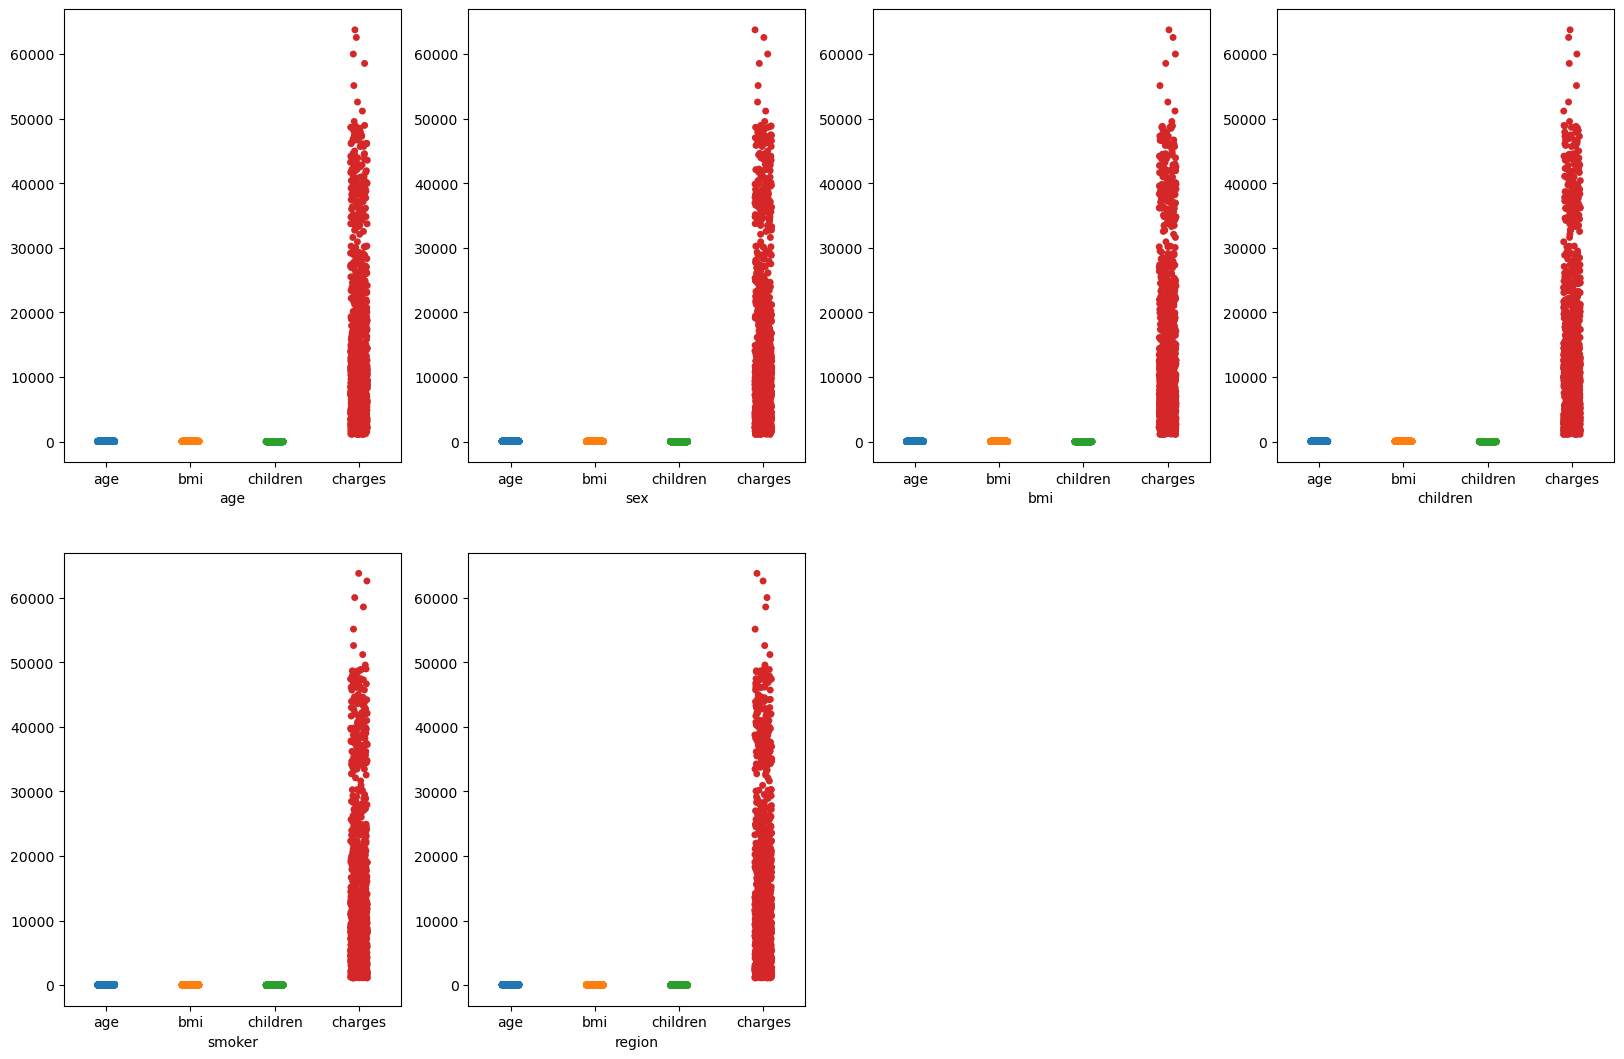

In [5]:
plt.figure(figsize=(20, 20), facecolor='white')

plotnumber = 1
for i in data:
    if plotnumber >=7:
        break
    ax = plt.subplot(3, 4, plotnumber)
    sns.stripplot(data=data)
    plt.xlabel(i)
    plotnumber += 1

plt.show()


In [6]:
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split the data into input features (X) and target variable (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate the models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print()


Model: Linear Regression
Mean Squared Error: 33596915.85
R2 Score: 0.78

Model: Decision Tree Regression
Mean Squared Error: 42446908.01
R2 Score: 0.73

Model: Random Forest Regression
Mean Squared Error: 20942520.92
R2 Score: 0.87

Model: Gradient Boosting Regression
Mean Squared Error: 18745176.48
R2 Score: 0.88



In [17]:
from sklearn.model_selection import GridSearchCV


In [19]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [20]:
# Train and evaluate the best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics and best parameters
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (Best Model):", mse)
print("R2 Score (Best Model):", r2)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (Best Model): 22812669.852340844
R2 Score (Best Model): 0.8530572866320028


In [22]:
# Define the parameter grid for each model
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Initialize the models
models = {
    "Decision Tree Regression": (DecisionTreeRegressor(random_state=42), dt_param_grid),
    "Random Forest Regression": (RandomForestRegressor(random_state=42), rf_param_grid),
    "Gradient Boosting Regression": (GradientBoostingRegressor(random_state=42), gb_param_grid)
}

# Perform hyperparameter tuning and evaluate the models
for model_name, (model, param_grid) in models.items():
    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Train and evaluate the best model
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics and best parameters
    print("Model:", model_name)
    print("Best Hyperparameters:", best_params)
    print("Mean Squared Error (Best Model):", mse)
    print("R2 Score (Best Model):", r2)
    print()


Model: Decision Tree Regression
Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (Best Model): 22812669.852340844
R2 Score (Best Model): 0.8530572866320028

Model: Random Forest Regression
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (Best Model): 19033662.84811111
R2 Score (Best Model): 0.8773989155001908

Model: Gradient Boosting Regression
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Mean Squared Error (Best Model): 19591873.300824985
R2 Score (Best Model): 0.8738033276499709



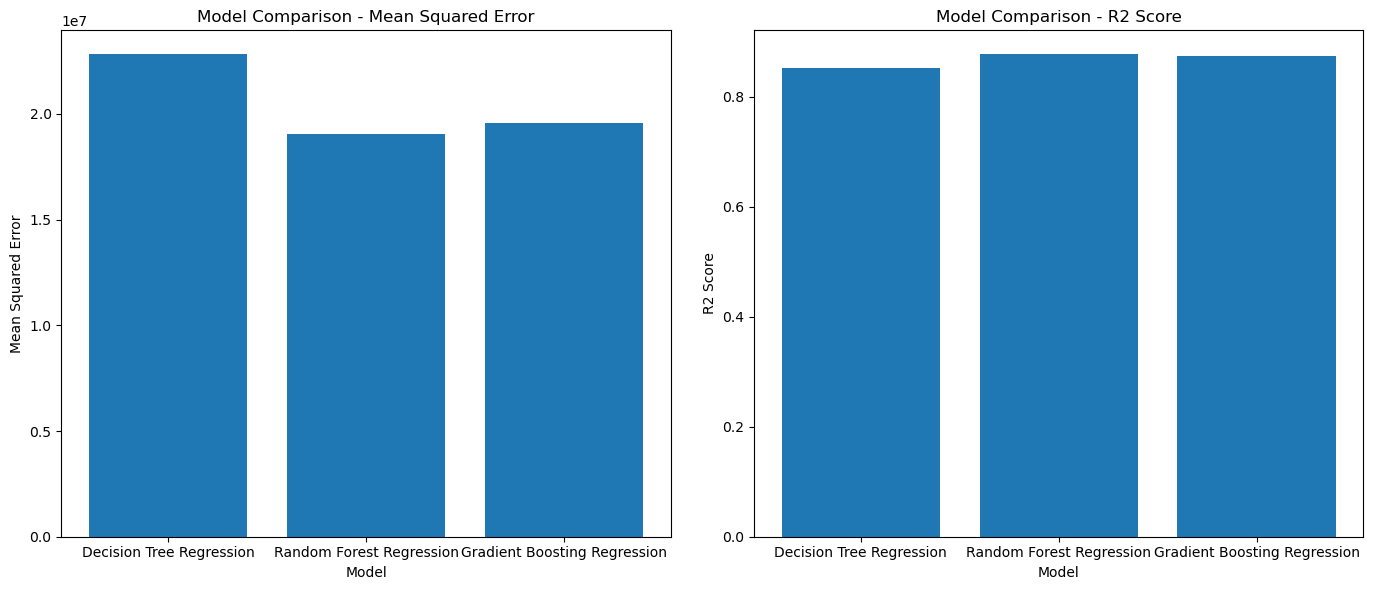

In [26]:
# Initialize lists to store model names, MSE, and R2 Score
model_names = []
mse_scores = []
r2_scores = []

# Perform hyperparameter tuning and evaluate the models
for model_name, (model, param_grid) in models.items():
    # Perform Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Train and evaluate the best model
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append the model name, MSE, and R2 Score to the lists
    model_names.append(model_name)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Create bar plots for MSE and R2 Score
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_scores)
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Model Comparison - Mean Squared Error")

plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("Model Comparison - R2 Score")

plt.tight_layout()
plt.show()
